In [ ]:
import os
import shutil

root_dir = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/PGS/FCLp-subsc-FCLa-INSULA_left"

dest_dir = "/home/cb283697/Bureau/PGS/FCLp-subsc-FCLa-INSULA_left"
os.makedirs(dest_dir, exist_ok=True)

for config_name in sorted(os.listdir(root_dir)):
    config_path = os.path.join(root_dir, config_name)

    if os.path.isdir(config_path):
        found = False
        for root, dirs, files in os.walk(config_path):
            # Look for 'ukb40_PGS_full_embeddings_random_embeddings' directory
            if ("ukb40_PGS_full_embeddings_random_embeddings" in root) and ("full_embeddings.csv" in files):
                full_path = os.path.join(root, "full_embeddings.csv")
                dest_file = os.path.join(dest_dir, f"full_embeddings_{config_name}.csv")
                try:
                    shutil.copy(full_path, dest_file)
                    print(f"Copied from: {full_path} → {dest_file}")
                    found = True
                    break
                except Exception as e:
                    print(f" Error copying {full_path}: {e}")
                    found = True
                    break
        if not found:
            print(f"⚠️  No full_embeddings.csv found for {config_name}")

print("\n Done copying all full_embeddings.csv files.")


In [2]:
import os
import shutil

# Set the root directory where different subfolders (e.g., name17-43-58_232) are located
root_dir = "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/FCLp-subsc-FCLa-INSULA_left"

# Destination directory to store the copied full_embeddings.csv files
dest_dir = "/home/cb283697/Bureau/PGS/FCLp-subsc-FCLa-INSULA_left/champollion"
os.makedirs(dest_dir, exist_ok=True)

# Loop through all subdirectories
for subfolder in sorted(os.listdir(root_dir)):
    subfolder_path = os.path.join(root_dir, subfolder)

    if os.path.isdir(subfolder_path):
        embeddings_path = os.path.join(
            subfolder_path,
            "ukb40_PGS_full_embeddings_random_embeddings",
            "full_embeddings.csv"
        )
        if os.path.exists(embeddings_path):
            dest_file = os.path.join(dest_dir, f"full_embeddings_{subfolder}.csv")
            try:
                shutil.copy(embeddings_path, dest_file)
                print(f"✅ Copied from: {embeddings_path} → {dest_file}")
            except Exception as e:
                print(f"❌ Error copying {embeddings_path}: {e}")
        else:
            print(f"⚠️  Missing full_embeddings.csv in: {subfolder}")

print("\n✅ Done copying all full_embeddings.csv files.")


✅ Copied from: /neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/FCLp-subsc-FCLa-INSULA_left/name17-43-58_232/ukb40_PGS_full_embeddings_random_embeddings/full_embeddings.csv → /home/cb283697/Bureau/PGS/FCLp-subsc-FCLa-INSULA_left/champollion/full_embeddings_name17-43-58_232.csv

✅ Done copying all full_embeddings.csv files.


In [4]:
import shutil

source = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/UKB_pgs_scz_sex_age.csv"
destination = "/home/cb283697/Bureau/PGS/UKB_pgs_scz_sex_age.csv"

try:
    shutil.copy(source, destination)
    print("✅ File successfully copied to your Bureau.")
except Exception as e:
    print(f"❌ Error copying file: {e}")


✅ File successfully copied to your Bureau.


In [9]:
import pandas as pd

# File paths
rh_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_freesurfer-summary/rh.a2009s.thickness.txt"
lh_path = "/neurospin/dico/data/human/UKBioBank/derivatives/ns_freesurfer-summary/lh.a2009s.thickness.txt"

# Load the data
rh_df = pd.read_csv(rh_path, delim_whitespace=True)
lh_df = pd.read_csv(lh_path, delim_whitespace=True)

# Automatically rename the first column in each file to "Subject"
rh_df.rename(columns={rh_df.columns[0]: "Subject"}, inplace=True)
lh_df.rename(columns={lh_df.columns[0]: "Subject"}, inplace=True)

# Select the mean thickness columns
rh_mean = rh_df[["Subject", "rh_MeanThickness_thickness"]]
lh_mean = lh_df[["Subject", "lh_MeanThickness_thickness"]]

# Merge on subject ID
merged = pd.merge(rh_mean, lh_mean, on="Subject")

# Compute total mean thickness
merged["Total_MeanThickness"] = merged["rh_MeanThickness_thickness"] + merged["lh_MeanThickness_thickness"]


# Rename for clarity
merged.rename(columns={"Subject": "ID"}, inplace=True)

# Save to CSV
output_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/MeanThickness.csv"
merged.to_csv(output_path, index=False)

print(f" File saved to {output_path}")
print(merged.head())


/tmp/ipykernel_2757207/1965093664.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rh_df = pd.read_csv(rh_path, delim_whitespace=True)
/tmp/ipykernel_2757207/1965093664.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lh_df = pd.read_csv(lh_path, delim_whitespace=True)


 File saved to /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/MeanThickness.csv
            ID  rh_MeanThickness_thickness  lh_MeanThickness_thickness  \
0  sub-1000021                     2.68975                     2.74799   
1  sub-1000325                     2.81157                     2.81593   
2  sub-1000458                     2.42456                     2.36699   
3  sub-1000575                     2.57115                     2.53906   
4  sub-1000606                     2.43185                     2.41740   

   Total_MeanThickness  
0              5.43774  
1              5.62750  
2              4.79155  
3              5.11021  
4              4.84925  


In [12]:
import pandas as pd

# Load thickness CSV
thickness_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/MeanThickness.csv"
thickness_df = pd.read_csv(thickness_path)

# Load skeleton surface CSV
skeleton_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/skeleton_size_agg.csv"  # adapt if different
skeleton_df = pd.read_csv(skeleton_path)


# Save to new file
output_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/surface_thickness.csv"

# Load CSVs
thickness_df = pd.read_csv(thickness_path)[["ID", "Total_MeanThickness"]]
skeleton_df = pd.read_csv(skeleton_path)

# Merge on ID
merged_df = pd.merge(thickness_df, skeleton_df, on="ID")

# Rename columns
merged_df = merged_df.rename(columns={
    "Total_MeanThickness": "Thikness",
    "skeleton_size_agg": "Tsurface"
})

# Save to CSV
merged_df.to_csv(output_path, index=False)

print(f"✅ File saved to: {output_path}")
print(merged_df.head())


✅ File saved to: /neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/surface_thickness.csv
            ID  Thikness  Tsurface
0  sub-1000021   5.43774     82163
1  sub-1000325   5.62750     79211
2  sub-1000458   4.79155     89807
3  sub-1000575   5.11021     71722
4  sub-1000606   4.84925     84822


Basic Statistics of Tsurface (mm²):

count     37717.000000
mean      75497.168757
std        7461.318315
min       48523.000000
25%       70214.000000
50%       75037.000000
75%       80310.000000
max      137218.000000
Name: Tsurface, dtype: float64

Number of potential outliers: 296


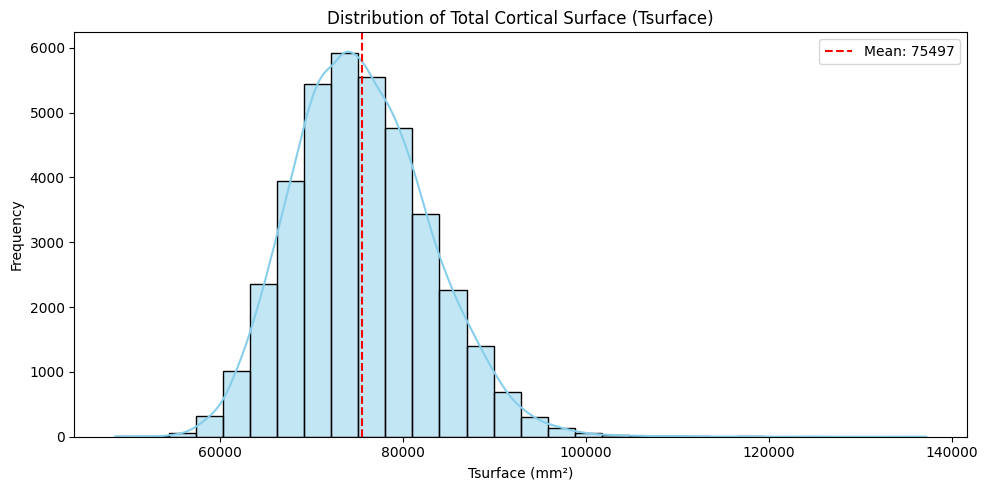

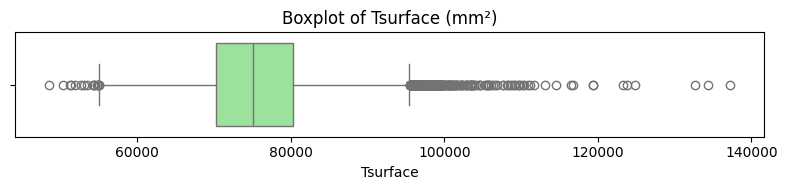

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/surface_thickness.csv") 

df["Tsurface"] = pd.to_numeric(df["Tsurface"], errors="coerce")


df = df.dropna(subset=["Tsurface"])


print("Basic Statistics of Tsurface (mm²):\n")
print(df["Tsurface"].describe())

#  Identify outliers (optional)
q1 = df["Tsurface"].quantile(0.25)
q3 = df["Tsurface"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["Tsurface"] < lower_bound) | (df["Tsurface"] > upper_bound)]
print(f"\nNumber of potential outliers: {len(outliers)}")

plt.figure(figsize=(10, 5))
sns.histplot(df["Tsurface"], bins=30, kde=True, color="skyblue")
plt.axvline(df["Tsurface"].mean(), color='red', linestyle='--', label=f"Mean: {df['Tsurface'].mean():.0f}")
plt.title("Distribution of Total Cortical Surface (Tsurface)")
plt.xlabel("Tsurface (mm²)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=df["Tsurface"], color="lightgreen")
plt.title("Boxplot of Tsurface (mm²)")
plt.tight_layout()
plt.show()
